# Project: Investigate a Dataset
# [TMDb Movies Dataset](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project revolves around analyzing data associated to the film industry, a subsection of the entertainment industry. In particular, we are interested in finding trends among the type of films on display and their relative success both in terms of their profitability, and their popularity as rated by the public. 

The following investigation is split into two core analyses.

Analysis 1 - Popularity:
- Which genres have the highest average popularity overall, and how has this changed year on year?
- Which directors are the most popular on average?

Analysis 2 - Revenue & Profit:
- Which factors are strongly correlated with the revenues and profit generated by movies?
- What is the relationship between movie budget and total revenue?
- What is the relationship between movie popularity and total revenue?
- Which genres generate the greatest profits? Does this trend agree with higher movie popularity?
- Which directors generate the greatest profits? Does this trend agree with higher movie popularity?
- How has profitability and revenue/budget ratio evolved year on year? What could be the reason for this?

<a id='wrangling'></a>
## Data Wrangling

Firstly, data is loaded, checked for cleanliness, and trimmed for analysis.

In [957]:
# Import Required Packages for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 'Magic Word' to show visualizations in Jupyter Notebook
%matplotlib inline
# Load dataset
df = pd.read_csv('tmdb-movies.csv')


### General Properties

Following is a brief description of the categories (columns) included in this dataset:

| Category | Description |
| --- | --- |
| **id** | Row identification |
| **imdb_id** | IMDb generated unique identifier |
| **popularity** | [Popularity](https://developers.themoviedb.org/3/getting-started/popularity) metric |
| **budget** | Budget at year of release [\\$] |
| **revenue** | Revenue at year of release [\\$] |
| **original_title** | Movie title |
| **cast** | Main movie cast |
| **homepage** | Movie webpage link |
| **director** | Movie director |
| **tagline** | Movie tagline |
| **keywords** | Words directly related to movie |
| **overview** | Brief movie synopsis |
| **runtime** | Total movie duration |
| **genres** | Movie genres |
| **production_companies** | Production Companies involved |
| **release_date** | Date of movie release |
| **vote_count** | Total viewer votes |
| **vote_average** | Average viewer vote |
| **release_year** | Year of movie release |
| **budget_adj** | Budget in 2010 \\$: Adjusted for inflation |
| **revenue_adj** | Revenue in 2010 \\$: Adjusted for inflation |

## Data Inspection
A high-level inspection of the dataset is now performed. First, general data information is obtained. This includes identification of the dataset structure by observing the first few rows.

In [958]:
## Explore First few rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next, total number of movie samples and categories, as well as the type of data included in each column is found.

In [959]:
# Explore dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Duplicate rows and number of missing data in each column are now identified.

In [960]:
# Duplicate Rows
print('No. of duplicate rows: {}'.format(df.duplicated().sum()))
# Missing Data
print('Missing data:\n{}'.format(df.isna().sum()))

No. of duplicate rows: 1
Missing data:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


Main observations of this exploration include:
- Total movie samples: 10866
- Total number of categories: 21
- Incorrect data-type: 'release_date' is object rather than datetime.
- Number of duplicate rows: 1
- Significant missing data (e.g. homepage, tagline, keywords...). Treatment of these is considered on a case by case basis for each investigation.

### Data Cleaning
First, the 'release_date' object data type is converted to datetime.

In [961]:
# Convert string to datetime & Check for success
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Remove the duplicated row.

In [962]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

#### Dropping unnecessary columns

Given the investigation proposed for this analysis, certain columns were identified as unnecessary for the entirety of the analysis. These were therefore dropped:
- **imdb_id**: Unnecesary indicators.
- **homepage, tagline, keywords**, **overview** and **production_companies**: Provide no useful information for proposed data analysis.
- **budget** & **revenue**: Data for inflation adjusted in terms of 2010 dollars [\\$] is included as **budget_adj** and **revenue_adj**. These are normalized and make analysis consistent over time, rendering the original values obsolete.
- **cast, production_companies, original_title**: Depends on analysis performed.

In [963]:
# Drop columns with unusable data
# df.drop([imdb_id','original_title', 'homepage', 'tagline', 'keywords', 'cast', 'overview', 'production_companies', 'budget', 'revenue'], axis=1, inplace=True)
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue', 'production_companies'], axis=1, inplace=True)
print('Missing data:\n{}'.format(df.isna().sum()))

Missing data:
id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


#### Criteria for dealing with missing data

Different criteria will be used for the different analyses performed. Columns with missing values are **cast, director** and **genres**.
It was also identified that the columns **budget_adj** and **revenue_adj** contained values of 0.0.

Analysis 1 ('Popularity'): Only data for **id, popularity, director** and **genres** are required. All rows with missing **genres** and **director** are dropped for the first research question, and those missing **director** for the second question.

Analysis 2 ('Revenue'): All rows with 0.0 inflation adjusted revenues are considered null or incorrect, and dropped as they are unfit for investigation.

Calculate profit

In [964]:
# Calculate Profit
profit_adj = df['revenue_adj'] - df['budget_adj']
df.insert(len(df.columns), "profit_adj", profit_adj)
df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


<a id='eda'></a>
## Exploratory Data Analysis

We now move to data exploration: compute statistics and create visualizations.

### Analysis 1 - Popularity
#### Research Question 1 - Which genres are most popular year on year

In [965]:
# Generate new dataframe for Research Question 1
df_a1_q1 = df.copy()
# Drop unnecessary columns for this investigation
df_a1_q1.drop(['original_title', 'cast', 'director', 'runtime', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
# Drop missing values of this particular dataframe
df_a1_q1.dropna(inplace=True)
df_a1_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10842 non-null  int64  
 1   popularity    10842 non-null  float64
 2   genres        10842 non-null  object 
 3   release_year  10842 non-null  int64  
 4   profit_adj    10842 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 508.2+ KB


The genres column is composed of multiple genre entries for some movies, separated by '|'. For comparison, these must be split. First, identify the unique genres present.

In [966]:
# Unique Genres
split_genres = df_a1_q1.genres.str.split('|').tolist()
unique_genres = set(x for l in split_genres for x in l)
print(unique_genres)

{'Foreign', 'Crime', 'Romance', 'Horror', 'Comedy', 'War', 'Drama', 'History', 'TV Movie', 'Mystery', 'Fantasy', 'Music', 'Adventure', 'Animation', 'Western', 'Documentary', 'Science Fiction', 'Family', 'Action', 'Thriller'}


Now, perform the following procedure to set up required data:
- Create dataframe listing genres of each movie indexed by the movie **id**.
- Stack resulting structure to create a Series structure indexed by **id** and including associated genres stacked.
- Reset **id** to column rather than index.
- Remove unwanted column between 'id' and genres.
- Rename column containing genres to 'genre'.
- Merge 'df_q1' and newly created 'stack_genre' dataframes to combine all information in working form.
- Drop columns no longer needed (i.e. 'id' and 'genres').

In [967]:
# Create stacked dataframe of movies indexed by 'id'
stack_genre = pd.DataFrame(split_genres, index=df_a1_q1['id']).stack()
# Reset 'id' to remove its index condition
stack_genre = stack_genre.reset_index()
# Remove unwanted mid-column information
stack_genre.drop(labels='level_1', axis=1, inplace=True)
# Rename column to 'genre'
stack_genre.rename(columns={0: 'genre'}, inplace=True)
stack_genre.head()

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [968]:
# Merge DataFrames
df_a1_q1_merged = pd.merge(df_a1_q1, stack_genre, on='id', how='left')
# Drop unwanted columns
df_a1_q1_merged.drop(['id', 'genres'], axis=1, inplace=True)
# Visualize DataFrame structure
df_a1_q1_merged.head()

,popularity,release_year,profit_adj,genre
0,32.985763,2015,1.254446e+09,Action
1,32.985763,2015,1.254446e+09,Adventure
2,32.985763,2015,1.254446e+09,Science Fiction
3,32.985763,2015,1.254446e+09,Thriller
4,28.419936,2015,2.101614e+08,Action


With the data in the desired working format, we now investigate data graphically.
1. Identify most popular movie genres over time by average popularity.
2. Split 20 movie genres into 4 sets of 5 movie genres by highest to lowest average popularity.
3. Compare popularity evolution of each subsection of genres year on year.

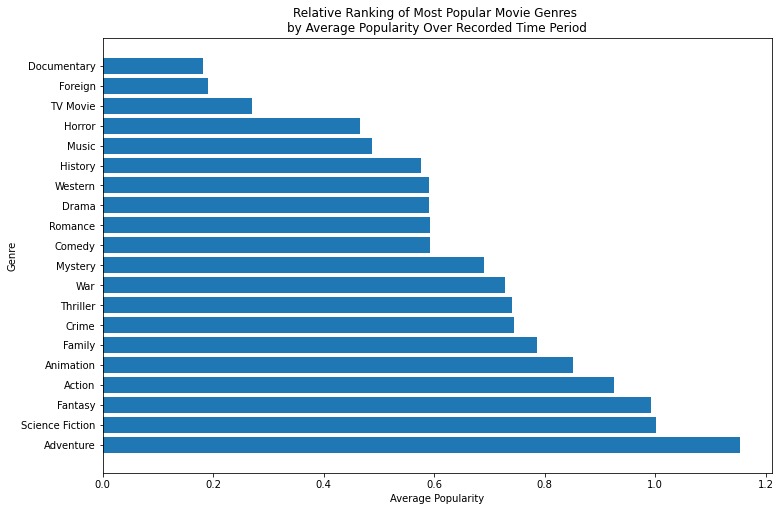

In [969]:
# Plot barchart of most popular movie genres over time by average popularity
df_barplot = df_a1_q1_merged.groupby(['genre']).mean().reset_index()
df_barplot.sort_values(by=['popularity'], ascending=False, inplace=True)
fig = plt.figure(figsize=(12,8))
plt.barh(df_barplot['genre'], df_barplot['popularity'])
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title("""Relative Ranking of Most Popular Movie Genres 
by Average Popularity Over Recorded Time Period""");

From the previous graph, we can identify 4 sets of 5 movie genres by decreasing popularity for additional comparison:
1. [Adventure, Science Fiction, Fantasy, Action, Animation]
2. [Family, Crime, Thriller, War, Mystery]
3. [Western, Comedy, Romance, Drama, History]
4. [Music, Horror, TV Movie, Foreign, Documentary]

In [970]:
# Group by Year & Genre + Find popularity per year per genre
df_group1 = df_a1_q1_merged.groupby(['release_year', 'genre']).mean().reset_index()

# Create a Function to plot by Groups
def group_plot(df, col, group, x, y, fig_size, title):
    """Function to plot graph based on values being present in particular column
    INPUTS:
    df - DataFrame: DataFrame containing values to plot
    col - str or int: Column to check for presence of desired value
    group - list: Values to search for in column
    x - str or int: Column name for x values in plot
    y - str or int: Column name for y values in plot
    fig_size - series: (a, b) where a is width and b is height
    title - str: Desired title for plot
    OUTPUT:
    Line graph of all values in group with respect to the input x and y
    """
    df_plot = df[(df[col].isin(group))]
    # Group by col and plot
    fig = plt.figure(figsize=fig_size)
    for i in group:
        cond = df_plot[col] == i
        group_true = df_plot[cond]
        plt.plot(group_true[x], group_true[y])
    # Better Plot Visualization
    plt.gca().legend(group, loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Average Popularity')
    plt.grid(which='major', color='k')
    plt.grid(which='minor')
    plt.minorticks_on()
    plt.xlim((1958, 2016))
    plt.title("""{}""".format(title));
    return fig

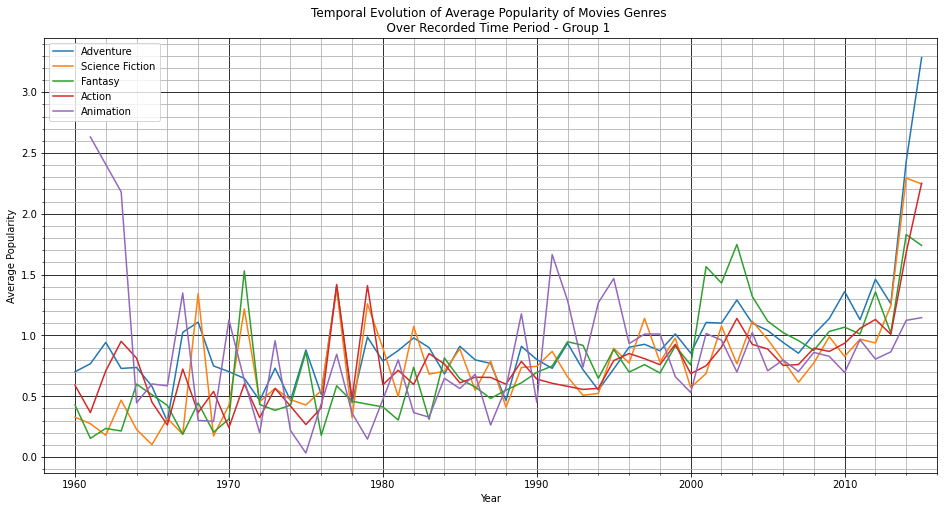

In [971]:
# Plot Group 1 Results
t = ("""Temporal Evolution of Average Popularity of Movies Genres 
    Over Recorded Time Period - Group 1""")
group_plot(df_group1, 'genre', df_barplot.genre[:5], 'release_year', 'popularity', fig_size=(16, 8), title=t)
plt.show()

This first graph shows a number of notable phenomena:
- All genres indicate a growing overall trend in average popularity over time. Starting at average popularities fluctuating around 0.5 in the 1960s, this value has risen to fluctuations around 1.0 by the 2010s.
- All of these categories have been the most popular at least for one year over the recorded time period.
- Animation should be highlighted: It was the most popular genre in the 1960s and most of the 1990s, yet has dropped to the least popular genre of this set by the 2010s. It is the only one to have an overall drop from first recorded year to last recorded year.
- Fantasy showed a notable rise in the early 2000s, but has lagged since.
- Adventure has experienced a very steep increase in popularity over the last few years, and it is still in an ascending trend.

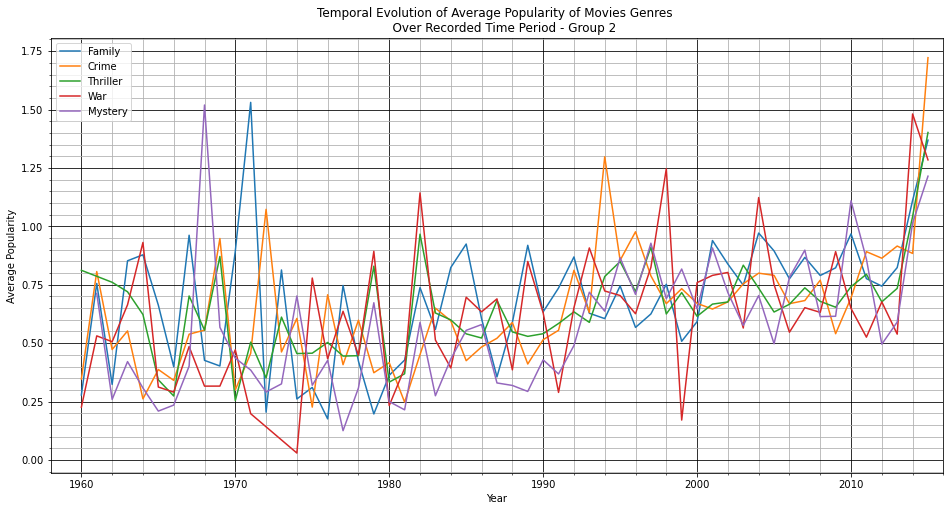

In [972]:
# Plot Group 2 Results
t = ("""Temporal Evolution of Average Popularity of Movies Genres 
    Over Recorded Time Period - Group 2""")
group_plot(df_group1, 'genre', df_barplot.genre[5:10], 'release_year', 'popularity', fig_size=(16, 8), title=t)
plt.show()

The most notable phenomena in Graph 2 are:
- There is insignificant overall growth in popularity for any of these genres. All of these fluctuate around 0.6 over most of the time-period, albeit punctual peaks and troughs.
- Popularity of all genres has peaked notably over the last few years. Magnitude wise, all of these genres have a higher popularity than Animation in Group 1 in 2015. However, this is only a local value, and Animation is much higher in average popularity over time.
- Growing trend is highest for Crime movies, although this peak is only local between 2014 and 2015.

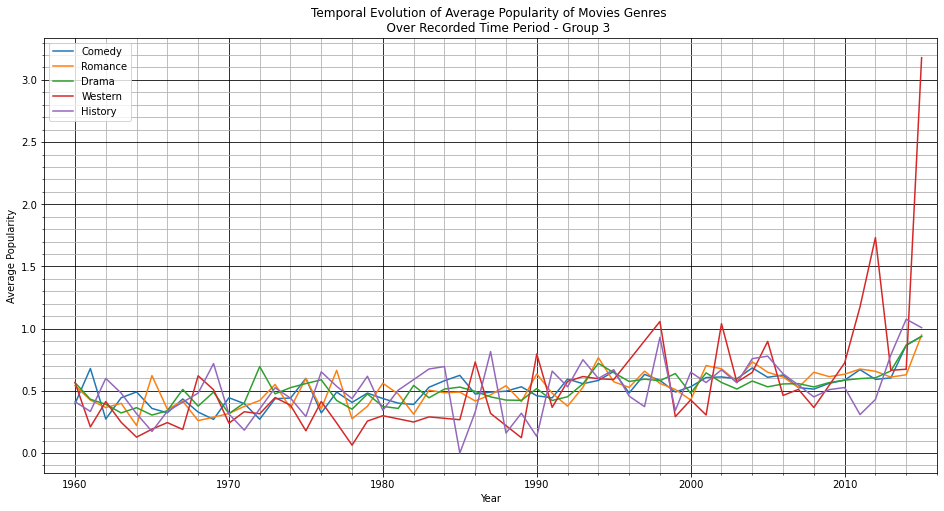

In [973]:
# Plot Group 3 Results
t = ("""Temporal Evolution of Average Popularity of Movies Genres 
    Over Recorded Time Period - Group 3""")
group_plot(df_group1, 'genre', df_barplot.genre[10:15], 'release_year', 'popularity', fig_size=(16, 8), title=t)
plt.show()

The most notable phenomena in Graph 3 are:
- Drama, Romance and Comedy are fairly constant with few fluctuation over the whole time period. Consistently low relative popularity around 0.5.
- Westerns follow similar trend up to 2010 (albeit slightly more fluctuating). However, a notable increase occurs from 2010 onwards, with a trough between 2013 and 2014, but a very high peak by 2015. Notably, in 2015 its peak would locate it as the second most popular genre just behind Adventure in Group 1.
- Drama is observing an increasing trend over the last 4 years. Moderate ascending behaviour throughout, but with very slow gradient.

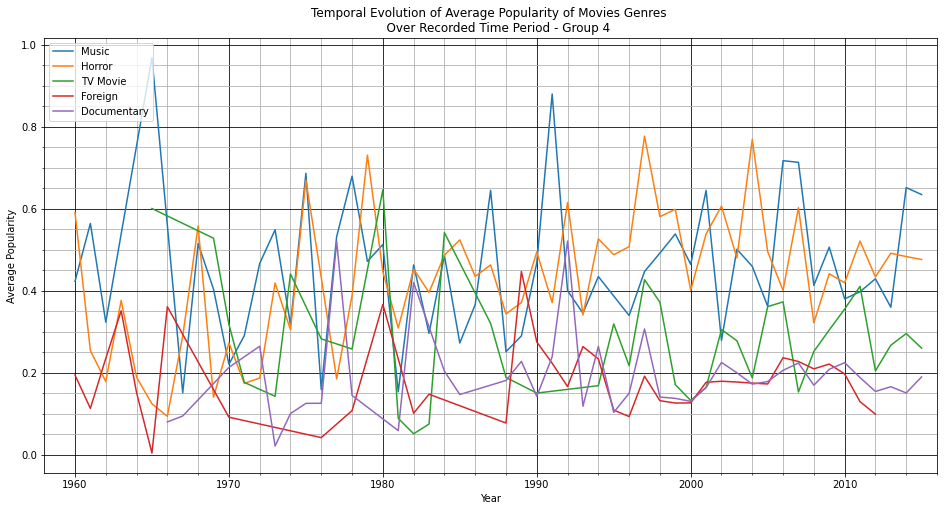

In [974]:
# Plot Group 4 Results
t = ("""Temporal Evolution of Average Popularity of Movies Genres 
    Over Recorded Time Period - Group 4""")
group_plot(df_group1, 'genre', df_barplot.genre[15:20], 'release_year', 'popularity', fig_size=(16, 8), title=t)
plt.show()

Notable Graph 4 phenomena:
- These genres are evidently the least popular throughout.
- Highly oscillatory behaviour, but rarely exceeding 0.6.
- No general ascending trend.

Overall Graph description (include popularity last year?)
Key points:
- Most popular genres overall indicating further increases in popularity throughout time. This is what makes them stand out as compared to the more unpopular, stagnated genres.
- In all cases there has been a notable increase in popularity over the last few years. This is potentially a consequence of increased media consumption given novel technologies.
- Increasing trend in popularity of Westerns is something to note, as the fast ascent has located them as second most popular genre in 2015, and with potential to surpass it given the increasing trend.

#### Research Question 2 - Which directors are most popular on average

In [975]:
# Popularity of directors (10 most popular directors)
# Generate new dataframe for Research Question 2
df_a1_q2 = df.copy()
# Drop unnecessary columns for this investigation
df_a1_q2.drop(['id', 'release_year', 'genres', 'original_title', 'cast', 'runtime', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj', 'profit_adj'], axis=1, inplace=True)
# Drop missing values of this particular dataframe
df_a1_q2.dropna(inplace=True)
df_a1_q2.head(10)

,popularity,director
0,32.985763,Colin Trevorrow
1,28.419936,George Miller
2,13.112507,Robert Schwentke
3,11.173104,J.J. Abrams
4,9.335014,James Wan
5,9.110700,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,8.654359,Alan Taylor
7,7.667400,Ridley Scott
8,7.404165,Kyle Balda|Pierre Coffin
9,6.326804,Pete Docter


Name of Director number 4 by average popularity was identified to be incorrect (include unexpected symbols due to Spanish characters). This should be changed from Alejandro GonzÃ¡lez IÃ±Ã¡rritu to Alejandro González Iñárritu.

In [976]:
# Swith name of Director with unexpected characters
df_a1_q2.replace('Alejandro GonzÃ¡lez IÃ±Ã¡rritu', 'Alejandro González Iñárritu', inplace=True)
# Check for success
print(df_a1_q2.loc[[5]])

   popularity                     director
5      9.1107  Alejandro González Iñárritu


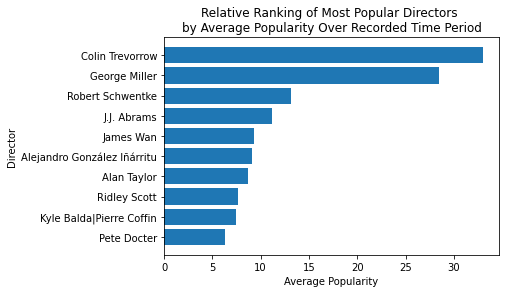

In [977]:
# Histogram of most popular directors in decreasing order
# unique_directors = list(set(x for l in df_q2['director'] for x in l))
# Group by Director + Find popularity per year per genre
df_a2_q2.groupby(['director']).mean().sort_values('popularity', ascending=False).reset_index()
# Plot most popular directors
plt.barh(df_a2_q2['director'][:10], df_a2_q2['popularity'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Average Popularity')
plt.ylabel('Director')
plt.title("""Relative Ranking of Most Popular Directors 
by Average Popularity Over Recorded Time Period""");

From the prior visualization, two results are evident:
- Colin Trevorrow and George Miller stand out as the directors with the most popular movies, being more than twice as popular as the 3rd ranked director.
- Only 4 directors obtain an average popularity greater than 10.

### Analysis 2: What factors drive Revenue and Profit?

An investigation of how different factors drive revenues and profits for the film industry would be of great interest. This is particularly true when deciding how much to invest on a movie, which movie genre to pursue, or which director to hire in order to maximize profits. The following sections address some of the questions to consider.


In [978]:
# Drop all rows with zero budget or zero revenue
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]
df.tail()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08,1.762585e+08
10828,5780,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07,6.718015e+07
10829,6644,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07,9.049166e+06
10835,5923,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,5.374412e+07
10848,2161,0.207257,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07,4.625353e+07


#### Research Question 1: Which factors are strongly correlated with the revenues and profit generated by movies?
A logical starting point for this analysis is to observe the correlation between the different numerical categories in the dataset and the revenue obtained. For all manipulations hereafter the 2010 inflation adjusted values for budget, revenue and profit were used.

In [979]:
# Obtain correlation between numerical categories and revenue
df.corr()['revenue_adj']

id             -0.088287
popularity      0.546959
runtime         0.280505
vote_count      0.654688
vote_average    0.266844
release_year   -0.103147
budget_adj      0.570451
revenue_adj     1.000000
profit_adj      0.981854
Name: revenue_adj, dtype: float64

As expected, these results indicate a strong correlation between revenues and budget invested, as well as between revenue and movie popularity. All other parameters indicate very weak correlations. Note that correlation with profit is of little use since profit is a function of revenue itself. Similarly, correlation with vote_count is of little practical use.

#### Research Question 2: What is the relationship between movie budget and total revenue?
It is therefore interesting to plot the relationship between revenue and budget invested.

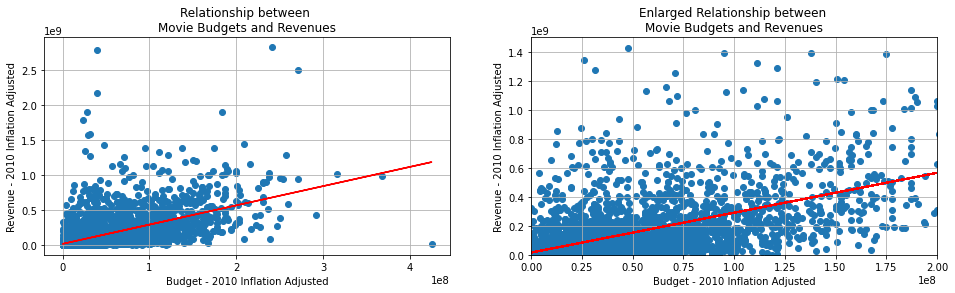

In [980]:
# Budget vs Revenues
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].scatter(df['budget_adj'], df['revenue_adj'])
z = np.polyfit(df['budget_adj'], df['revenue_adj'], 1)
p = np.poly1d(z)
axs[0].plot(df['budget_adj'], p(df['budget_adj']), color='r')
axs[0].set_xlabel('Budget - 2010 Inflation Adjusted')
axs[0].set_ylabel('Revenue - 2010 Inflation Adjusted')
axs[0].grid()
axs[0].set_title("""Relationship between 
Movie Budgets and Revenues""")
# Enlarge image near origin
axs[1].scatter(df['budget_adj'], df['revenue_adj']);
z = np.polyfit(df['budget_adj'], df['revenue_adj'], 1)
p = np.poly1d(z)
axs[1].plot(df['budget_adj'], p(df['budget_adj']), color='r')
axs[1].set_xlabel('Budget - 2010 Inflation Adjusted')
axs[1].set_ylabel('Revenue - 2010 Inflation Adjusted')
axs[1].grid()
axs[1].set_xlim([0, 2e8])
axs[1].set_ylim([0, 1.5e9])
axs[1].set_title("""Enlarged Relationship between 
Movie Budgets and Revenues""");

The previous graph shows this positive correlation between budget invested and revenue obtained via the best-fit line plotted through the results.

#### Research Question 3: What is the relationship between movie popularity and total revenue?
The second positive correlation between revenues and popularity is visualized next.

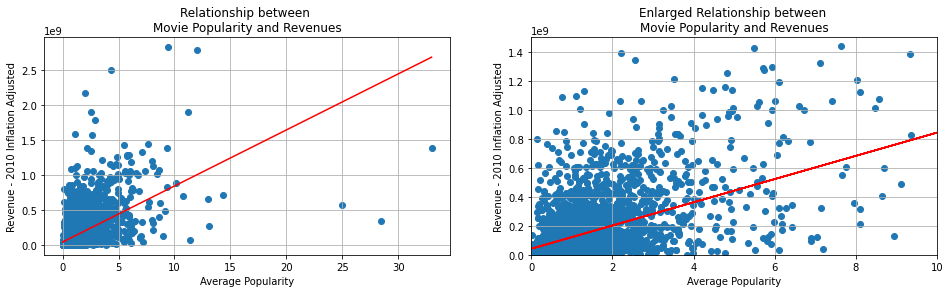

In [981]:
# Revenues vs Popularity
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].scatter(df['popularity'], df['revenue_adj'])
z = np.polyfit(df['popularity'], df['revenue_adj'], 1)
p = np.poly1d(z)
axs[0].plot(df['popularity'], p(df['popularity']), color='r')
axs[0].set_xlabel('Average Popularity')
axs[0].set_ylabel('Revenue - 2010 Inflation Adjusted')
axs[0].grid()
axs[0].set_title("""Relationship between 
Movie Popularity and Revenues""")
# Enlarge image near origin
axs[1].scatter(df['popularity'], df['revenue_adj']);
z = np.polyfit(df['popularity'], df['revenue_adj'], 1)
p = np.poly1d(z)
axs[1].plot(df['popularity'], p(df['popularity']), color='r')
axs[1].set_xlabel('Average Popularity')
axs[1].set_ylabel('Revenue - 2010 Inflation Adjusted')
axs[1].grid()
axs[1].set_xlim([0, 10])
axs[1].set_ylim([0, 1.5e9])
axs[1].set_title("""Enlarged Relationship between 
Movie Popularity and Revenues""");

In [982]:
df.sort_values(by=['popularity'], ascending=False)[:3]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08


Again, the positive correlation is evident. There are three outliers of particular interest, with the highest popularity yet revenues well below the expected amount given the general trend. These are Jurassic World, Mad Max: Fury Road and Interstellar.

#### Research Questions 4 & 5:
Following this analysis, we pose two more questions.
- Which genres generate the greatest profits? Does this trend agree with higher movie popularity?
- Which directors generate the greatest profits? Does this trend agree with higher movie popularity?

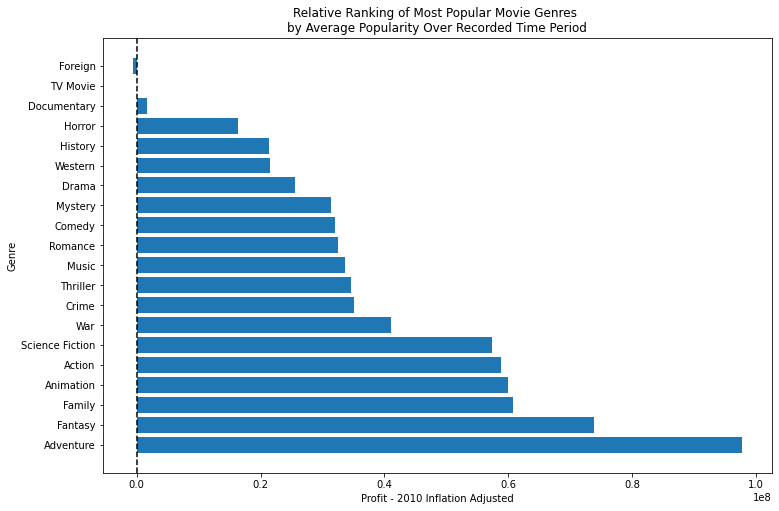

In [983]:
# Which Genres are more profitable
# Plot barchart of most profitable movie genres
df_barplot = df_a1_q1_merged.groupby(['genre']).mean().reset_index()
df_barplot.sort_values(by=['profit_adj'], ascending=False, inplace=True)
fig = plt.figure(figsize=(12,8))
plt.barh(df_barplot['genre'], df_barplot['profit_adj'])
plt.xlabel('Profit - 2010 Inflation Adjusted')
plt.ylabel('Genre')
plt.axvline(x=0, color='k', linestyle='--')
plt.title("""Relative Ranking of Most Popular Movie Genres 
by Average Popularity Over Recorded Time Period""");

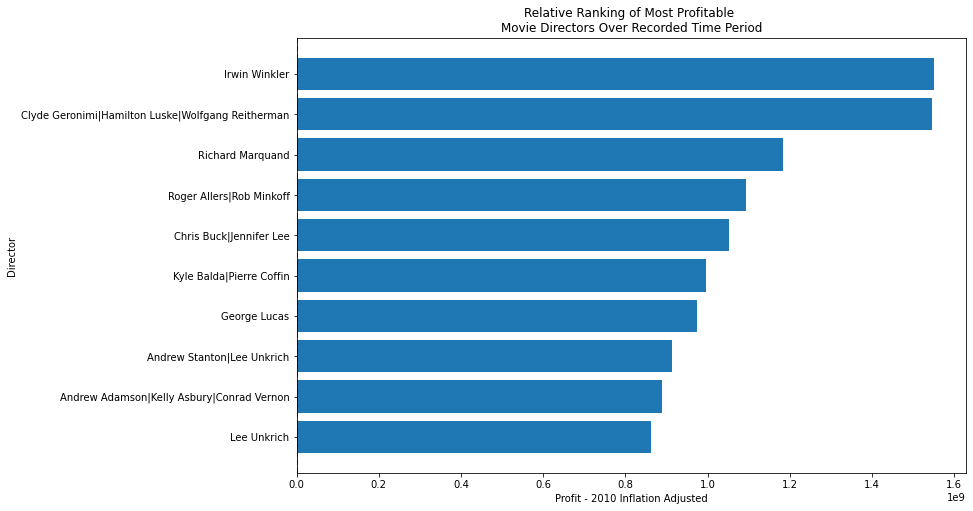

In [984]:
# Profitability of different Directors
# Plot barchart of most profitable directors
df_temp = df.copy()
df_barplot = df_temp.groupby(['director']).mean().reset_index()
df_barplot.sort_values(by=['profit_adj'], ascending=False, inplace=True)
fig = plt.figure(figsize=(12,8))
plt.barh(df_barplot['director'][:10], df_barplot['profit_adj'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Profit - 2010 Inflation Adjusted')
plt.ylabel('Director')
plt.axvline(x=0, color='k', linestyle='--')
plt.title("""Relative Ranking of Most Profitable 
Movie Directors Over Recorded Time Period""");

Main Genre Results:
- Agree to a certain extent with popularity results.
- Exact position of genres does not entirely agree with popularity results, but relative movement of positions is minor.
- Least profitable and popular genres are still TV Movie and Foreign, with latter being the only genre losing money (negative profitability).
- Most profitable and popular genre maintained as Adventure.
- Family rises to second in profitability, whilst it was only 6th in popularity. This could be a consequence of these movies generally being intended for younger audience, which are less likely to vote and increase popularity, yet generate high revenues as all the family goes together to the cinema, increasing head-count.

Main Director Results:
- Most profitable directors per movie **do not** coincide with those with the greatest average popularity per movie.
- Distribution less top heavy than for popularity. Lower percentage difference between top two results and the rest (as compared to popularity results were top two directors stand out). This indicates a smoother distribution in most profitable directors.

#### Research Question 6: Profit evolution over time
One final question to answer is how have profits evolved over time. For this, we generate two visuals: 
- Average Revenue/Budget Ratio against Time.
- Average Total Profit against Time.

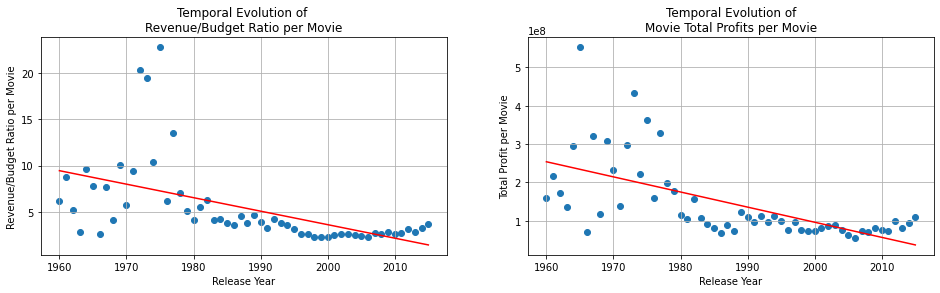

In [985]:
# Group by Release Year and Calculate Mean
df_year = df.groupby(['release_year']).mean().reset_index()
# Revenue/Budget Ratio over the years
# Create Revenue/Budget Ratio column
r_b_ratio = df_year['revenue_adj'] / df_year['budget_adj']
df_year.insert(len(df_year.columns), "r/b_ratio", r_b_ratio)
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].scatter(df_year['release_year'], df_year['r/b_ratio'])
z = np.polyfit(df_year['release_year'], df_year['r/b_ratio'], 1)
p = np.poly1d(z)
axs[0].plot(df_year['release_year'], p(df_year['release_year']), color='r')
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Revenue/Budget Ratio per Movie')
axs[0].grid()
axs[0].set_title("""Temporal Evolution of 
Revenue/Budget Ratio per Movie""")
# Plot Total Profit over Time
axs[1].scatter(df_year['release_year'], df_year['profit_adj']);
z = np.polyfit(df_year['release_year'], df_year['profit_adj'], 1)
p = np.poly1d(z)
axs[1].plot(df_year['release_year'], p(df_year['release_year']), color='r')
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('Total Profit per Movie')
axs[1].grid()
axs[1].set_title("""Temporal Evolution of
Movie Total Profits per Movie""");

Evidently, this analysis indicates how year on year profits have dropped overall for the time-period recorded. Three behaviours are of particular interes:
- The overall trend is decreasing, with a strong negative correlation.
- There was a sharp peak in profits during the early 1970s, but this eventually drop by the late 1980s to follow the general decreasing trend.
- Having reached a trough in 2000, revenue/budget ratios have started to recover, and are slowly moving towards a growing behaviour. Total profits have however plateaued over the last few years recorded in the dataset.

This brings up a final question as to what the relationship between average total profits per film and number of film releases in a year is. We now visualize this.

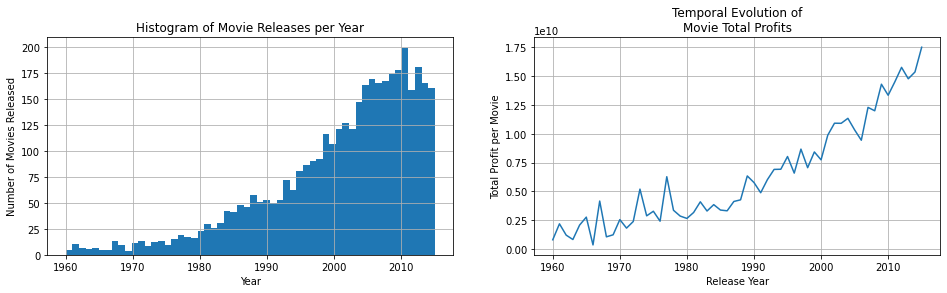

In [986]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16,4))
# Number of Movies Released per Year
axs[0].hist(df['release_year'], bins=df['release_year'].nunique())
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Movies Released')
axs[0].set_title('Histogram of Movie Releases per Year');
axs[0].grid()

# Plot Total Profit over Time
df_temp=df.groupby(['release_year']).sum().reset_index()
axs[1].plot(df_temp['release_year'], df_temp['profit_adj'])
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('Total Profit per Movie')
axs[1].grid()
axs[1].set_title("""Temporal Evolution of
Movie Total Profits""");

The results suggest an interesting result, which is that as time progresses, an increasing number of films are released per year, whilst total profits per film were observed to decrease.
A potential explanation for this could be that the film industry total profits are not increasing at the same rate as number of movie releases. This means people are spending the same amount of money over a larger proportion of movies, thereby casusing an overall reduction in the total profits per movie.

This is proved by the disparity in the relationships of movies released over time and revenues over time. The former shows an exponential rise, while the latter indicates a linear increase. Therefore, overall, the total profits per movie must decrease as the movies released per year are rising faster than the profits.

<a id='conclusions'></a>
## Conclusions

### Analysis 1 - Popularity
#### Research Question 1: Which genres have the highest average popularity overall, and how has this changed year on year?
- Most popular genres overall by average popularity: [1. Adventure, 2. Science Fiction, 3. Fantasy, 4. Action, 5. Animation].
- Increasing popularity of most movie genres throughout time. This is particularly true for the generally high popularity genres, making them stand out as compared to the more unpopular, stagnated genres.
- Notable increase in popularity over the last few years.
- Westerns show largest increase in popularity over last few years.

#### Research Question 2: Which directors are the most popular on average?
- Colin Trevorrow and George Miller stand out as the directors with the most popular movies, being more than twice as popular as the 3rd ranked director.
- Only 4 directors obtain an average popularity greater than 10.

### Analysis 2 - Revenues and Profits
#### Research Question 1: Which factors are strongly correlated with the revenues and profit generated by movies?
- Strong correlation between revenues and budget invested.
- Strong correlation between revenues and movie popularity.
- All other parameters indicate very weak correlations, or correlation of little use for this analysis.

#### Research Question 2: What is the relationship between movie budget and total revenue?
- Positive correlation between budget invested and revenues obtained.

#### Research Question 3: What is the relationship between movie popularity and total revenue?
- Positive correlation between popularity and revenues obtained.
- There are three outliers of particular interest, with the highest popularity yet revenues well below the expected amount given the general trend. These are Jurassic World, Mad Max: Fury Road and Interstellar.

#### Research Question 4: Which genres generate the greatest profits? Does this trend agree with higher movie popularity?
- Agree to a certain extent with popularity results.
- Most profitable and popular genre is Adventure.
- Least profitable and popular genres are TV Movie and Foreign. Foreign is the only genre losing money (negative profitability).
- For maximum profitability, movie genre should be [1. Adventure, 2. Fantasy, 3. Family, 4. Animation, 5. Action].
- For maximum popularity, movie genres should be [1. Adventure, 2. Science Fiction, 3. Fantasy, 4. Action, 5. Animation].

#### Research Question 5: Which directors generate the greatest profits? Does this trend agree with higher movie popularity?
- Most profitable directors per movie do not coincide with those with the greatest average popularity per movie.
- For maximum profits, hire [1. Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman, 2. Roger Allers|Rob Minkoff, 3. Kyle Balda|Pierre Coffin, 4. George Lucas].
- For maximum popularity, hire [1. Colin Trevorrow, 2. George Miller, 3. Robert Schwentke, 4. J.J. Abrams].

#### Research Question 6: How has profitability and revenue/budget ratio evolved year on year? What could be the reason for this?
- Strong negative correlation.
- Year on year total profits per movie have dropped overall for the time-period recorded.
- There was a sharp peak in profits during the early 1970s. Eventually drops by the late 1980s to follow the general decreasing trend.
- Revenue/budget ratio has started recovering following a trough in 2000, and are slowly moving towards a growing behaviour. Total profits have however plateaued over the last few years recorded in the dataset.

#### Additional Question: Why have average profits per movie dropped over time?
- Exponential rise of movie releases per year over time.
- Linear rise of total movie profits per year over time.
- Overall, total **profits per movie** decrease as movie production increase rate exceeds total profit generation increase over time.

### Limitations
Some limitaion considerations:
- Dropped entries with 0.0 budget and revenue. Loss of data (albeit data that was of no use for analysis).
- Data is not confirmed to be accurate/up-to-date.
- Average values selected without consideration of number of incidences. I.e. A director might have a very high average popularity per film, but has only directed one film. This index is therefore not a fullproof metric of success since it lacks volume and consistency for claim to be true.


Overall, the analysis was highly insightful. Although some limitations apply, generality was maintained as much as possible, and conclusions do prove of certain value in outlining general trends and asnwering the questions posed. Evidently, further questions and investigations could be performed.

### Appendix

In [987]:
# Alternative function to split and group data for Genre type columns
# For personal reference!
# Not for Report!

In [988]:
# Explode Function
# Reference: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [989]:
# Explode 'genres' column into separate rows for eah genre
df_split = explode(df.assign(genres=df.genres.str.split('|')), 'genres', fill_value='|')

# Group by Year & Genre + Find popularity per year per genre
df_split.groupby(['release_year', 'genres']).mean()

budget_adj             id  popularity  \
release_year genres                                                     
1960         Action           5.161077e+07     966.500000    1.504538   
             Adventure        1.474593e+07     966.000000    1.872132   
             Comedy           2.211890e+07    9628.500000    0.501564   
             Drama            3.884804e+07     596.666667    1.564871   
             History          8.847561e+07     967.000000    1.136943   
...                                    ...            ...         ...   
2015         Romance          1.867599e+07  260240.222222    2.108030   
             Science Fiction  9.906723e+07  192784.590909    7.594638   
             Thriller         3.918415e+07  242821.574468    3.913396   
             War              3.937598e+07  251789.800000    1.943238   
             Western          8.233996e+07  277602.500000    7.504550   

                                profit_adj   revenue_adj     runtime  \
release_year genres                                                    
1960         Action           1.876605e+08  2.392712e+08  162.500000   
             Adventure        2.141847e+07  3.616441e+07  128.000000   
             Comedy           9.621723e+07  1.183361e+08  108.000000   
             Drama            2.486977e+08  2.875457e+08  143.666667   
             History          3.539024e+08  4.423780e+08  197.000000   
...                                    ...           ...         ...   
2015         Romance          6.686963e+07  8.554563e+07  110.277778   
             Science Fiction  3.027898e+08  4.018570e+08  118.909091   
             Thriller         1.119523e+08  1.511364e+08  110.361702   
             War              8.811818e+07  1.274942e+08  116.200000   
             Western          2.344668e+08  3.168067e+08  161.500000   

                              vote_average   vote_count  
release_year genres                                      
1960         Action               6.950000   217.500000  
             Adventure            7.000000   224.000000  
             Comedy               7.550000   124.000000  
             Drama                7.600000   542.000000  
             History              6.900000   211.000000  
...                                    ...          ...  
2015         Romance              6.450000   720.555556  
             Science Fiction      6.422727  2485.409091  
             Thriller             6.014894  1095.319149  
             War                  6.680000   624.000000  
             Western              7.300000  3159.000000  

[842 rows x 8 columns]